In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib,h2o

Ethen 2018-06-17 10:14:00 

CPython 3.6.4
IPython 6.4.0

numpy 1.14.5
pandas 0.23.0
sklearn 0.19.1
matplotlib 2.2.2
h2o 3.18.0.11


In [2]:
h2o.init(max_mem_size="4G", nthreads=-1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /Users/mingyuliu/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/b6/fy5cl70s7nq6g7275rkdpd6m3967fj/T/tmpnr4rb187
  JVM stdout: /var/folders/b6/fy5cl70s7nq6g7275rkdpd6m3967fj/T/tmpnr4rb187/h2o_mingyuliu_started_from_python.out
  JVM stderr: /var/folders/b6/fy5cl70s7nq6g7275rkdpd6m3967fj/T/tmpnr4rb187/h2o_mingyuliu_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_mingyuliu_8cbajf
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [3]:
import os


docker_data_path = "/home/h2o/data/nlp/AmazonReviews.csv"
if os.path.isfile(docker_data_path):
    data_path = docker_data_path
else:
    data_path = "https://s3.amazonaws.com/tomk/h2o-world/megan/AmazonReviews.csv"


# Load data into H2O
reviews = h2o.import_file(data_path)
print('dimension: ', reviews.shape)
reviews.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
dimension:  (100000, 10)


ProductId,UserId,Summary,Score,HelpfulnessDenominator,Id,ProfileName,HelpfulnessNumerator,Time,Text
B00141QYSQ,A1YS02UZZGRDCT,Do Not Buy,1,2,41471,Evan Eberhardt,2,1.34836e+09,"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one."
B0089SPEO2,A3JOYNYL458QHP,Less lemon and less zing,3,0,28582,coleridge,0,1.32391e+09,"Everything is ok, except it just isn't as good as it is in the bags. Just considerably more bland -- less lemon and less zing. Boring."
B001PMCDK2,A14TTMM0Z03Y2W,my cat goes crazy for these!,5,0,389965,Lindsay S. Bradford,0,1.3106e+09,"Best cat treat ever. There isn't anything comparable to the love my cat has for these treats, he snubs away any other kind now.I know he likes to manipulate me with his cattiness but these treats are my way of manipulating him to come sit on my lap and have some chill time. :)"
B002Q8JOSI,A17UQD2RSSQH5X,My dogs tell me these treats are YUMMY,5,1,212536,in the dark,1,1.31613e+09,"My two Corgis were thoroughly spoiled by my late husband (I spent a year and a half dieting them down a combined total of 25 pounds!)They are accustomed to the finest of fare, and they absolutely love the Wellness brand of treats."
B00176G870,A2F2MZW8EOGH5J,Yummy to the tummy,5,0,115971,"daemoncycler """"When you arrive at a fork in th..",0,1.33479e+09,We used to have drive down to the specialty pet food store for this product. So glad we discovered Amazon. As far as I can tell it is no more expensive & in some cases less - Prime membership is awesome. Loving Pets treats are some of the best according to my dog. They do not develop that nasty smell like some dog treats do.
B001CHFUGY,A2M8VROSDPU4JT,Very good coffee,5,1,434484,"Officefan """"Officefankt",1,1.27725e+09,"I really liked this coffee, it was just as good as everyone claimed it was. Strong, bold and flavorful! I would recommend!"
B0041CIR62,A16I6WJUEBJ1C3,okay but not as healthy as it appears,2,1,138997,"doctorsirena """"doctorsirena",1,1.34369e+09,"I am always looking for healthier, whole grain versions of foods I enjoy. Unfortunately, these Peacock brand noodles are yet another food masquerading as healthy. The product title in big letters on the front says """"Brown Rice Vermicelli"""", making the consumer think """"this is made with brown rice, so it should be a healthy choice"""". But the first indication that it is not is when looking at the fiber content on the nutrition facts - only 0.6g per 2oz serving. Then onto the ingredients list to see why so low... contains brown rice, sago starch and water. The sago starch comes from palms and must not have much (if any) fiber.The Annie Chun's Maifun Brown Rice Noodles (sold on Amazon and in my local healthy grocer) has become one of my staples and is my frame of reference when comparing to the Peacock brand. The Annie Chun's product is made with 100% whole grain, with ingredients brown rice flour and water. Per 2oz serving, it has 4g fiber and pretty much the same calories and other nutrients as the Peacock brand.If you do try this Peacock brand noodles and have not used rice noodles before, you will need to seek guidance elsewhere on preparation. As others have pointed out, the Peacock package gives almost no directions on how to prepare the product, aside from a brief mention in the recipes (in the header text it does say that they are """"easy-to-cook"""" but does not say how). It also contains a very strange recipe for rice noodles: Aglio Olio style - this is an Italian recipe for noodles with olive oil/garlic/sprinkled with grated cheese that I think would not be very tasty. The second recipe appears to be for a soup with veggie strips. Neither recipe gives amounts or much direction. In co

In [4]:
reviews["PositiveReview"] = (reviews["Score"] >= 4).ifelse("1", "0")
reviews["PositiveReview"].table()

PositiveReview,Count
0,21791
1,78209


In [10]:
# Find the 80th quantile of time in the dataset
time_split = reviews["Time"].quantile(prob = [0.8])[1]
reviews["Train"] = (reviews["Time"] < time_split).ifelse("Yes", "No")

train = reviews[reviews["Train"] == "Yes"]
test = reviews[reviews["Train"] == "No"]

In [11]:
from h2o.estimators import H2OGradientBoostingEstimator

predictors = ['ProductId', 'UserId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time']
response = 'PositiveReview'

gbm_baseline = H2OGradientBoostingEstimator(
    stopping_metric = "AUC", stopping_tolerance = 0.001,
    stopping_rounds = 5, score_tree_interval = 10,
    model_id = "gbm_baseline")
gbm_baseline.train(x = predictors, y = response, 
                   training_frame = train, validation_frame = test)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [14]:
auc_basline = round(gbm_baseline.auc(valid = True), 3)
print("AUC on Validation Data: " + str(auc_baseline))

AUC on Validation Data: 0.616


In [16]:
docker_data_path = "/home/h2o/data/nlp/stopwords.csv"
if os.path.isfile(docker_data_path):
    data_path = docker_data_path
else:
    data_path = "https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/h2o-world-2017/nlp/stopwords.csv"

STOP_WORDS = pd.read_csv(data_path, header=0)
STOP_WORDS = list(STOP_WORDS['STOP_WORD'])
print('number of stop words: ', len(STOP_WORDS))
STOP_WORDS[:4]

number of stop words:  153


['all', 'just', 'being', 'over']

In [37]:
reviews["Text"].head(1)

Text
"These are made in China (do not buy ANY pet food from China). Dogswell has been using propylene glycol to soften their treats (what are they thinkng?). Do not purchase or support this company in any way until they clean up their act. And for whatever reason Amazon doesn't allow returns of this item, so I had to toss mine out. Bad business all around on this one."


In [38]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words


# Break reviews into sequence of words, each
# document is NA-delimited
words = tokenize(reviews["Text"])
words.head()

C1
made
china
buy
pet
food
china
dogswell
using
propylene
glycol


In [39]:
from h2o.estimators.word2vec import H2OWord2vecEstimator

w2v_model = H2OWord2vecEstimator(vec_size = 100, model_id = "w2v", min_word_freq = 5,
                                 init_learning_rate = 0.025, window_size = 5, epochs = 10)
w2v_model.train(training_frame=words)

word2vec Model Build progress: |██████████████████████████████████████████| 100%


In [41]:
model_path = h2o.save_model(model=w2v_model, path="h2o_word2vec", force=True)
print(model_path)

# load the model
w2v_model = h2o.load_model(model_path)
w2v_model

/Users/mingyuliu/programming/h2o/word2vec.hex/w2v
Model Details
H2OWord2vecEstimator :  Word2Vec
Model Key:  w2v
No model summary for this model



In [42]:
w2v_model.find_synonyms("coffee", count = 5)

OrderedDict([('coffe', 0.8193124532699585),
             ('coffees', 0.7763321995735168),
             ('espresso', 0.7719445824623108),
             ('starbucks', 0.7608339190483093),
             ('expresso', 0.7532685995101929)])

In [43]:
review_vecs = w2v_model.transform(words, aggregate_method = "AVERAGE")
review_vecs.head(4)

C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31,C32,C33,C34,C35,C36,C37,C38,C39,C40,C41,C42,C43,C44,C45,C46,C47,C48,C49,C50,C51,C52,C53,C54,C55,C56,C57,C58,C59,C60,C61,C62,C63,C64,C65,C66,C67,C68,C69,C70,C71,C72,C73,C74,C75,C76,C77,C78,C79,C80,C81,C82,C83,C84,C85,C86,C87,C88,C89,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
-0.0463052,-0.0198721,-0.248952,-0.030404,0.100143,-0.0910014,-0.181478,0.0107157,-0.0210963,0.095649,-0.192369,-0.0377484,0.129269,0.0769198,0.0828871,-0.0358408,0.0641253,0.0519398,-0.0989578,0.0944838,-0.00952095,0.0525226,-0.0500398,-0.0683829,0.10035,-0.142365,0.147245,-0.0107623,0.0638276,-0.0497933,-0.280014,0.126338,0.0714604,0.0505446,-0.104884,0.0473058,-0.0267035,-0.0553858,0.0215945,0.201222,0.0473612,-0.117811,-0.0917339,-0.0705038,0.150654,-0.145374,0.0264473,0.0581711,0.0743181,-0.0874778,0.10529,0.194862,0.131601,-0.0330842,0.0608716,-0.0358879,0.0503461,0.262126,0.0907296,0.0238046,0.024126,-0.123116,-0.188742,-0.119689,-0.202028,-0.0732663,0.0405454,0.110674,-0.00184143,0.0387393,-0.0610742,0.00113976,-0.0131127,-0.228056,0.0128015,0.0411284,0.185348,-0.0462662,0.114632,-0.118671,-0.0151642,0.13426,-0.21583,-0.0992447,-0.0968049,0.13871,0.0324233,0.0491166,0.113368,-0.105388,-0.085838,-0.127432,0.0466055,-0.103998,0.0478826,-0.0807484,0.0824676,-0.004455,0.0865262,0.108566
0.00509159,-0.0189465,-0.0661406,-0.0484443,-0.00514054,0.0899014,-0.0992617,0.0573277,0.00711776,-0.0553532,-0.301289,-0.030409,0.110836,-0.105349,-0.127497,-0.0673719,0.145876,0.0945435,0.0742308,0.319202,-0.0632906,0.105694,0.0567837,0.0863535,0.103349,-0.0966197,0.0626337,0.0544982,-0.0664467,0.0576377,-0.142891,-0.124847,-0.196188,0.0143645,0.0149464,0.0180943,0.0268125,0.0544979,-0.0353175,0.0287976,-0.0749648,-0.150965,-0.099752,-0.149286,0.0464907,-0.107054,-0.0557973,-0.0635595,0.0922084,-0.0608321,-0.00108356,0.168873,0.108874,0.0170585,0.0427305,0.0749775,-0.14166,0.130928,0.1125,-0.141825,0.0587807,-0.189195,0.0220006,0.160568,-0.194533,0.0484297,-0.000850583,-0.0871238,0.157015,-0.0676941,-0.178805,-0.00762922,-0.059508,-0.0978083,-0.0262982,-0.0436394,0.0690295,-0.0115328,0.173044,0.0251513,0.0840271,0.125993,-0.00076654,-0.0390403,-0.107826,0.00756249,-0.0554425,-0.0104439,0.101695,0.100414,-0.146628,-0.0937379,0.125699,-0.187979,-0.0301601,-0.096461,0.197729,0.0264086,0.00607202,0.0858073
-0.0157016,-0.00839377,-0.11004,-0.0231545,0.0958546,0.0798934,-0.0830675,0.047949,0.0637283,0.0153035,-0.101975,-0.0126229,0.106256,0.135099,-0.00110128,-0.118203,0.15099,0.0925168,0.0393169,0.165223,-0.0490176,0.057955,0.0687079,-0.0647911,0.121337,-0.124455,0.184852,-0.0722681,0.000670095,-0.229577,-0.092353,-0.125219,0.0655169,-0.0162774,-0.135394,0.000847207,0.0320345,-0.0655831,-0.00874973,0.0849821,-0.061653,-0.186292,-0.125034,-0.197592,0.142233,-0.00213658,-0.147324,0.226233,0.0762219,-0.21909,-0.0334835,0.146756,0.0910342,-0.0601745,0.0555199,0.000765284,-0.0226822,0.123864,-0.0134487,-0.0401069,-0.122163,-0.209258,-0.140343,-0.0932813,-0.11548,0.011382,0.0341971,-0.133397,0.0784401,0.0269271,-0.200002,-0.123487,-0.0618992,-0.147754,0.134584,0.0750574,0.175153,-0.0074265,0.130784,-0.101436,-0.0686525,0.052054,-0.029219,-0.045631,0.0956215,-0.0416289,-0.00422015,-0.0568515,0.140533,-0.0296923,-0.108107,-0.0649667,-0.0584205,-0.130207,0.0315152,-0.101023,0.072241,-0.0792135,0.0938374,0.0527103
-0.0133918,-0.0915861,-0.243635,0.0577918,0.0263968,0.0558005,-0.0132933,0.086194,0.0449592,0.00551624,-0.113201,0.0794307,0.0562868,0.0115986,-0.0566611,-0.0328615,0.0210184,0.0565018,-0.0108131,0.275687,-0.103403,0.128052,0.191137,-0.0358369,0.0611131,-0.0983391,0.0266057,-0.058991,0.0136212,-0.045358,-0.143305,-0.0297938,-0.070509,-0.0354738,-0.106834,-0.146325,-0.05937,-0.0473297,0.0136303,-0.0288791,0.048721,-0.141282,-0.0899816,-0.183555,0.0762486,0.0634069,-0.117626,0.18489,0.150318,-0.0967796,-0.0350318,0.200771,0.148286,-0.14806,0.10067,-0.00862323,-

In [44]:
ext_reviews = reviews.cbind(review_vecs)
ext_train = ext_reviews[ext_reviews["Train"] == "Yes"]
ext_test = ext_reviews[ext_reviews["Train"] == "No"]

In [45]:
predictors = predictors + review_vecs.names
response = 'PositiveReview'

gbm_embeddings = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_embeddings"
                                             )
gbm_embeddings.train(x = predictors, y = response, 
                   training_frame = ext_train, validation_frame = ext_test
                  )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))
print("With Embeddings AUC: " + str(round(gbm_embeddings.auc(valid = True), 3)))

Baseline AUC: 0.616
With Embeddings AUC: 0.876


In [50]:
# Break summaries into sequence of words
summary_words = tokenize(reviews["Summary"].ascharacter())

# Add aggregated summary word embeddings
summary_vecs = w2v_model.transform(summary_words, aggregate_method = "AVERAGE")
summary_vecs.names = ["summary_" + s for s in summary_vecs.names]
ext_reviews = ext_reviews.cbind(summary_vecs)

In [51]:
ext_train = ext_reviews[ext_reviews["Train"] == "Yes"]
ext_test = ext_reviews[ext_reviews["Train"] == "No"]

In [52]:
predictors = predictors + summary_vecs.names
response = 'PositiveReview'

gbm_plus_summary = H2OGradientBoostingEstimator(stopping_metric = "AUC", stopping_tolerance = 0.001,
                                              stopping_rounds = 5, score_tree_interval = 10,
                                              model_id = "gbm_plus_summary.hex"
                                             )
gbm_plus_summary.train(x = predictors, y = response, 
                       training_frame = ext_train, validation_frame = ext_test
                      )

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [53]:
print("Baseline AUC: " + str(round(gbm_baseline.auc(valid = True), 3)))
print("With Embeddings AUC: " + str(round(gbm_embeddings.auc(valid = True), 3)))
print("With Summary and Review Embeddings AUC: " + str(round(gbm_plus_summary.auc(valid = True), 3)))

Baseline AUC: 0.616
With Embeddings AUC: 0.876
With Summary and Review Embeddings AUC: 0.912


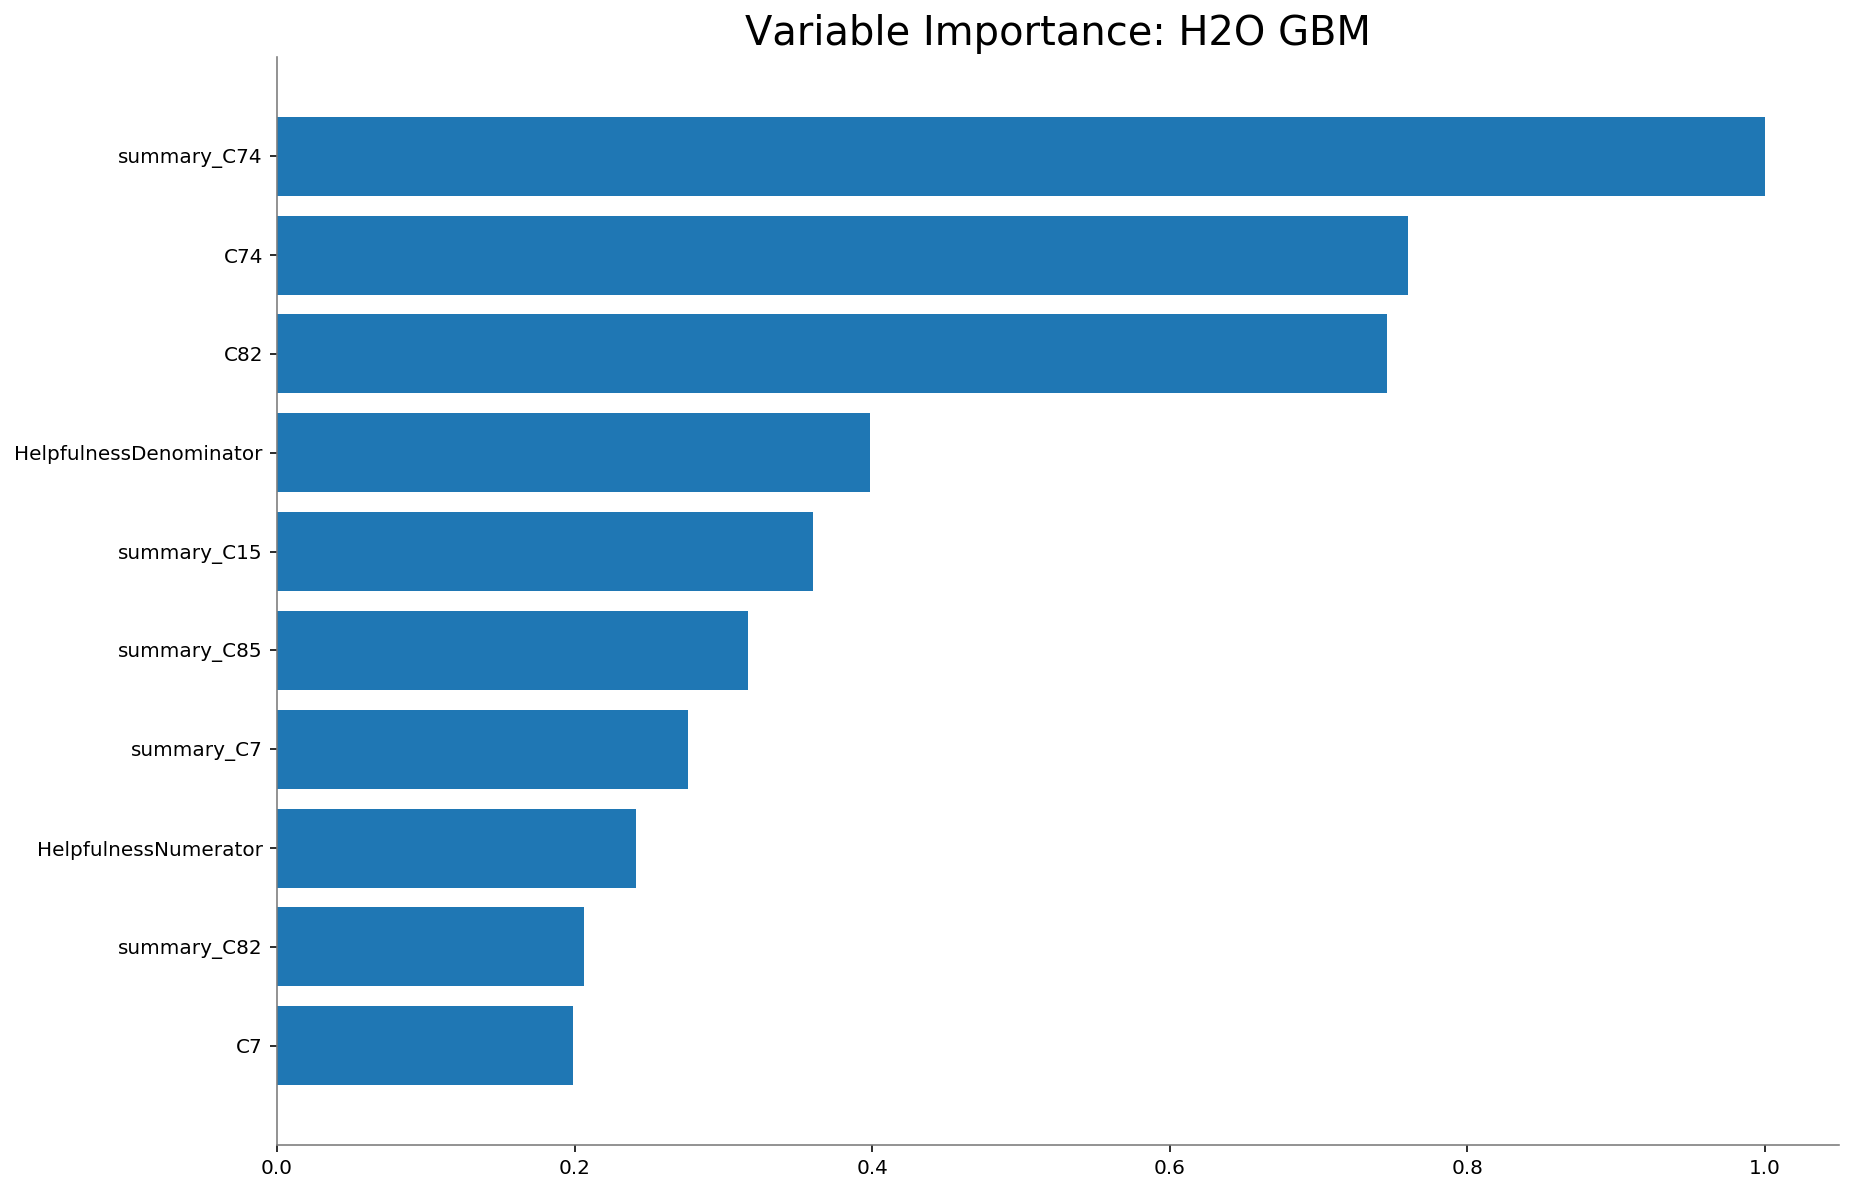

In [54]:
gbm_plus_summary.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


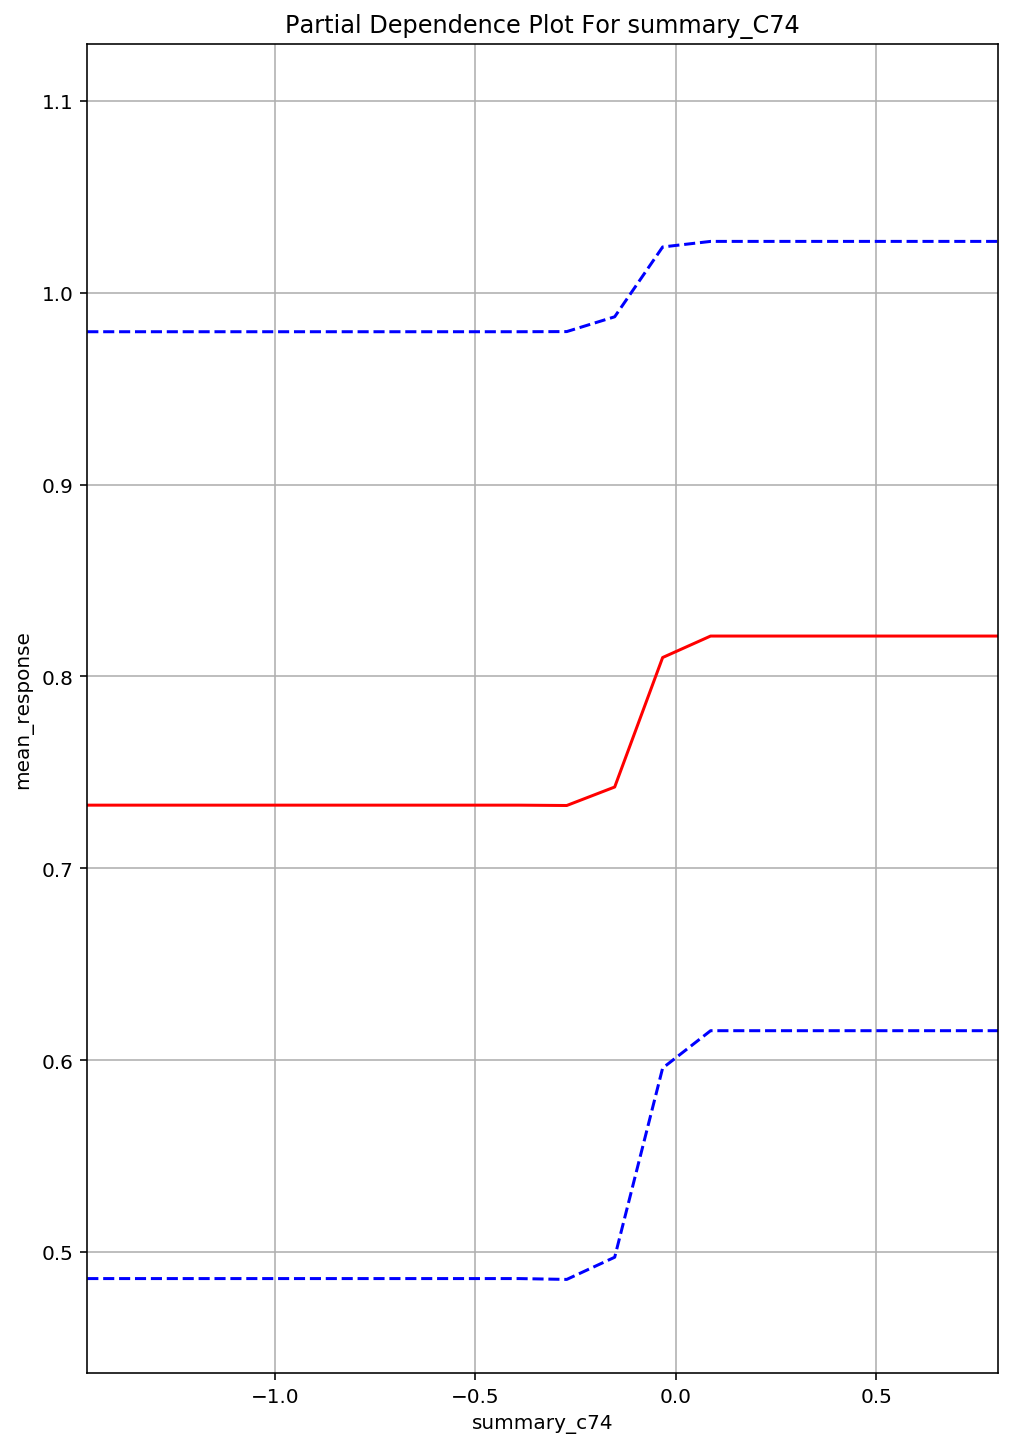

In [55]:
pdp_word_vecs = gbm_plus_summary.partial_plot(data = ext_train, cols = ["summary_C74"])

In [56]:
unique_words = words.asfactor().unique().ascharacter()
unique_words.col_names = ["Word"]
word_embeddings = w2v_model.transform(unique_words, aggregate_method="None")
word_embeddings = unique_words.cbind(word_embeddings)
word_embeddings = word_embeddings[~(word_embeddings["C1"].isna())]

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1855: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


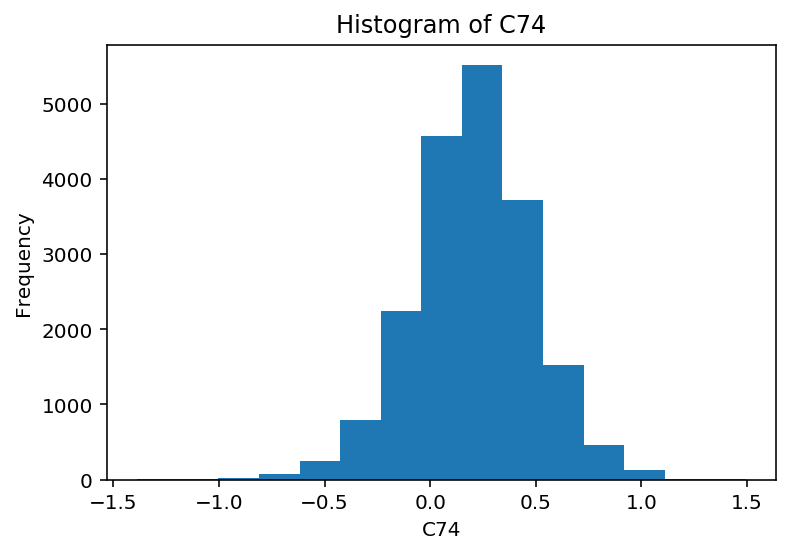

In [58]:
word_embeddings["C74"].hist()

In [60]:
low_c43_words = word_embeddings[word_embeddings["C74"] < -1.1]
low_c43_words[["Word", "C74"]].head(15)

Word,C74
acesulfame,-1.61351
aggressive,-1.21987
antler,-1.16316
beagles,-1.18111
bha,-1.20897
bully,-1.36573
carnivores,-1.12673
chewer,-1.4676
chewers,-1.42606
choo,-1.25873
